In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# EDA

In [2]:
df = pd.read_csv('../data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,NaN,bachelor's degree,standard,none,72.0,NaN,74
1,female,group C,some college,standard,completed,NaN,90.0,88
2,female,group B,master's degree,standard,NaN,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               999 non-null    object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      997 non-null    object 
 5   math score                   999 non-null    float64
 6   reading score                998 non-null    float64
 7   writing score                1000 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,999.000000,998.000000,1000.000000
mean,66.086086,69.178357,68.054000
std,15.170395,14.609468,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [5]:
df.shape

(1000, 8)

In [6]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                    int64
dtype: object

In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        3
math score                     1
reading score                  2
writing score                  0
dtype: int64

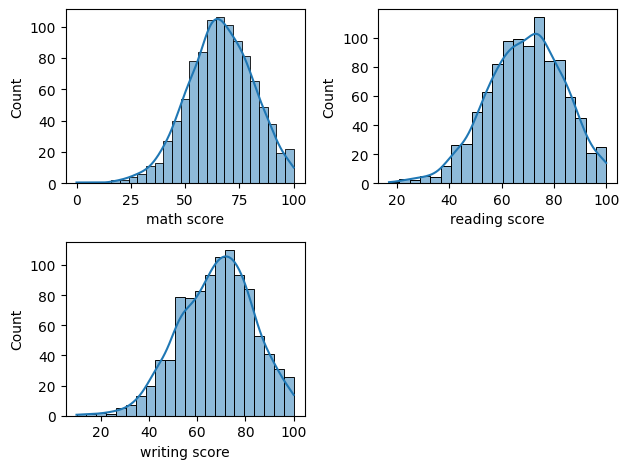

In [9]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
plotting('math score',1)
plotting('reading score',2)
plotting('writing score',3)
plt.tight_layout()

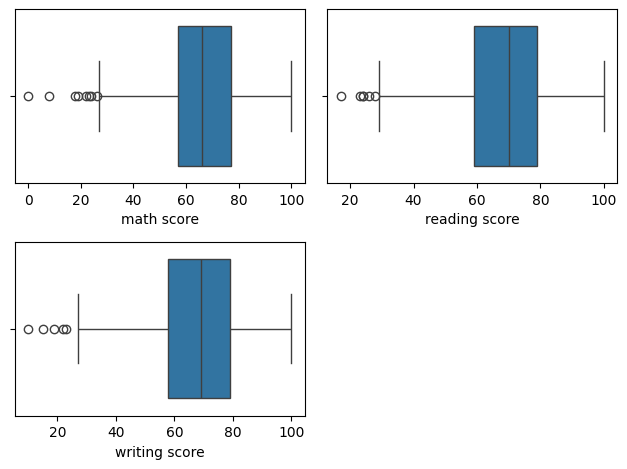

In [10]:
def box_plotting(var,num):
    plt.subplot(2,2,num)
    sns.boxplot(x = df[var])
box_plotting('math score',1)
box_plotting('reading score',2)
box_plotting('writing score',3)
plt.tight_layout()

In [11]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

In [12]:
df_clean = df.copy()
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,NaN,bachelor's degree,standard,none,72.0,NaN,74
1,female,group C,some college,standard,completed,NaN,90.0,88
2,female,group B,master's degree,standard,NaN,90.0,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.0,NaN,44
4,male,group C,some college,standard,none,76.0,78.0,75


In [13]:
df_clean.drop_duplicates(inplace=True)

In [14]:
df_clean.shape

(1000, 8)

In [15]:
# Fill the all null fild using Mean
df_clean['math score'].fillna(df_clean['math score'].mean(), inplace=True)
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,NaN,bachelor's degree,standard,none,72.000000,NaN,74
1,female,group C,some college,standard,completed,66.086086,90.0,88
2,female,group B,master's degree,standard,NaN,90.000000,95.0,93
3,male,group A,associate's degree,free/reduced,none,47.000000,NaN,44
4,male,group C,some college,standard,none,76.000000,78.0,75


In [16]:
df_clean['reading score'].fillna(df_clean['reading score'].mean(), inplace=True)
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,NaN,bachelor's degree,standard,none,72.000000,69.178357,74
1,female,group C,some college,standard,completed,66.086086,90.000000,88
2,female,group B,master's degree,standard,NaN,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.178357,44
4,male,group C,some college,standard,none,76.000000,78.000000,75


In [17]:
df_clean['writing score'].fillna(df_clean['writing score'].mean(), inplace=True)
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,NaN,bachelor's degree,standard,none,72.000000,69.178357,74
1,female,group C,some college,standard,completed,66.086086,90.000000,88
2,female,group B,master's degree,standard,NaN,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.178357,44
4,male,group C,some college,standard,none,76.000000,78.000000,75


In [18]:
df_clean.isnull().sum()

gender                         0
race/ethnicity                 1
parental level of education    0
lunch                          0
test preparation course        3
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [19]:
df_clean['race/ethnicity'].fillna(df_clean['race/ethnicity'].mode()[0], inplace=True)
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,bachelor's degree,standard,none,72.000000,69.178357,74
1,female,group C,some college,standard,completed,66.086086,90.000000,88
2,female,group B,master's degree,standard,NaN,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.178357,44
4,male,group C,some college,standard,none,76.000000,78.000000,75


In [20]:
df_clean['test preparation course'].fillna(df_clean['test preparation course'].mode()[0], inplace=True)
df_clean.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,bachelor's degree,standard,none,72.000000,69.178357,74
1,female,group C,some college,standard,completed,66.086086,90.000000,88
2,female,group B,master's degree,standard,none,90.000000,95.000000,93
3,male,group A,associate's degree,free/reduced,none,47.000000,69.178357,44
4,male,group C,some college,standard,none,76.000000,78.000000,75


In [21]:
df_clean.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

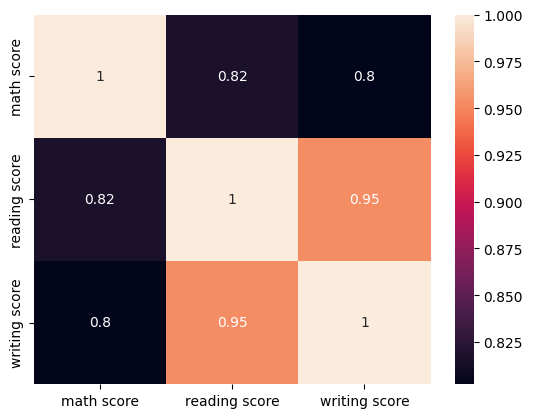

In [22]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)

# Data Preprocessing and Cleaning

In [23]:
cat_cols = df_clean.select_dtypes(include="object").columns
df_clean = pd.get_dummies(df_clean, columns=cat_cols, drop_first=True)
df_clean = df_clean.astype(int)
df_clean.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,69,74,0,0,1,0,0,1,0,0,0,0,1,1
1,66,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,69,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean[["math score","reading score","writing score"]] = scaler.fit_transform(df_clean[["math score","reading score","writing score"]]).round(2)
df_clean.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.39,-0.01,0.39,0,0,1,0,0,1,0,0,0,0,1,1
1,-0.01,1.43,1.31,0,0,1,0,0,0,0,0,1,0,1,0
2,1.58,1.77,1.64,0,1,0,0,0,0,0,1,0,0,1,1
3,-1.26,-0.01,-1.58,1,0,0,0,0,0,0,0,0,0,0,1
4,0.65,0.60,0.46,1,0,1,0,0,0,0,0,1,0,1,1


In [25]:
 df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   math score                                     1000 non-null   float64
 1   reading score                                  1000 non-null   float64
 2   writing score                                  1000 non-null   float64
 3   gender_male                                    1000 non-null   int64  
 4   race/ethnicity_group B                         1000 non-null   int64  
 5   race/ethnicity_group C                         1000 non-null   int64  
 6   race/ethnicity_group D                         1000 non-null   int64  
 7   race/ethnicity_group E                         1000 non-null   int64  
 8   parental level of education_bachelor's degree  1000 non-null   int64  
 9   parental level of education_high school        1000 n

# Feature Engineering

In [26]:
df_clean['total_score'] = df_clean['math score'] + df_clean['reading score'] + df_clean['writing score']

In [27]:
df_clean.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,total_score
0,0.39,-0.01,0.39,0,0,1,0,0,1,0,0,0,0,1,1,0.77
1,-0.01,1.43,1.31,0,0,1,0,0,0,0,0,1,0,1,0,2.73
2,1.58,1.77,1.64,0,1,0,0,0,0,0,1,0,0,1,1,4.99
3,-1.26,-0.01,-1.58,1,0,0,0,0,0,0,0,0,0,0,1,-2.85
4,0.65,0.60,0.46,1,0,1,0,0,0,0,0,1,0,1,1,1.71


In [28]:
df_clean['performance_level'] = pd.cut(df_clean['total_score'], bins=3, labels=['low', 'mid', 'high'])
df_clean.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,total_score,performance_level
0,0.39,-0.01,0.39,0,0,1,0,0,1,0,0,0,0,1,1,0.77,high
1,-0.01,1.43,1.31,0,0,1,0,0,0,0,0,1,0,1,0,2.73,high
2,1.58,1.77,1.64,0,1,0,0,0,0,0,1,0,0,1,1,4.99,high
3,-1.26,-0.01,-1.58,1,0,0,0,0,0,0,0,0,0,0,1,-2.85,mid
4,0.65,0.60,0.46,1,0,1,0,0,0,0,0,1,0,1,1,1.71,high


In [29]:
df_clean["read_write_interaction"] = df_clean["reading score"] * df_clean["writing score"]
df_clean.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,total_score,performance_level,read_write_interaction
0,0.39,-0.01,0.39,0,0,1,0,0,1,0,0,0,0,1,1,0.77,high,-0.0039
1,-0.01,1.43,1.31,0,0,1,0,0,0,0,0,1,0,1,0,2.73,high,1.8733
2,1.58,1.77,1.64,0,1,0,0,0,0,0,1,0,0,1,1,4.99,high,2.9028
3,-1.26,-0.01,-1.58,1,0,0,0,0,0,0,0,0,0,0,1,-2.85,mid,0.0158
4,0.65,0.60,0.46,1,0,1,0,0,0,0,0,1,0,1,1,1.71,high,0.2760


In [30]:
df_clean

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,total_score,performance_level,read_write_interaction
0,0.39,-0.01,0.39,0,0,1,0,0,1,0,0,0,0,1,1,0.77,high,-0.0039
1,-0.01,1.43,1.31,0,0,1,0,0,0,0,0,1,0,1,0,2.73,high,1.8733
2,1.58,1.77,1.64,0,1,0,0,0,0,0,1,0,0,1,1,4.99,high,2.9028
3,-1.26,-0.01,-1.58,1,0,0,0,0,0,0,0,0,0,0,1,-2.85,mid,0.0158
4,0.65,0.60,0.46,1,0,1,0,0,0,0,0,1,0,1,1,1.71,high,0.2760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.45,2.04,1.77,0,0,0,0,1,0,0,1,0,0,1,0,5.26,high,3.6108
996,-0.27,-0.97,-0.86,1,0,1,0,0,0,1,0,0,0,0,1,-2.10,mid,0.8342
997,-0.47,0.12,-0.20,0,0,1,0,0,0,1,0,0,0,0,0,-0.55,mid,-0.0240
998,0.13,0.60,0.59,0,0,0,1,0,0,0,0,1,0,1,0,1.32,high,0.3540


In [31]:
df_clean.to_csv("../output/final_dataset.csv", index=False)